In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from scipy.stats import shapiro

In [156]:
df=pd.read_csv('/content/cleaned_dataset.csv') #after data cleaning
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55.0,14.0,Restaurant(<20),1d,0.0,21,Unmarried partner,...,never,1~3,4~8,1~3,1.0,0.0,0.0,0.0,1.0,1.0
1,No Urgent Place,Friend(s),Sunny,80.0,10.0,Coffee House,2h,0.0,21,Unmarried partner,...,never,1~3,4~8,1~3,1.0,0.0,0.0,0.0,1.0,0.0
2,No Urgent Place,Friend(s),Sunny,80.0,10.0,Carry out & Take away,2h,0.0,21,Unmarried partner,...,never,1~3,4~8,1~3,1.0,1.0,0.0,0.0,1.0,1.0
3,No Urgent Place,Friend(s),Sunny,80.0,14.0,Coffee House,2h,0.0,21,Unmarried partner,...,never,1~3,4~8,1~3,1.0,1.0,0.0,0.0,1.0,0.0
4,No Urgent Place,Friend(s),Sunny,80.0,14.0,Coffee House,1d,0.0,21,Unmarried partner,...,never,1~3,4~8,1~3,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,Home,Partner,Rainy,55.0,18.0,Carry out & Take away,1d,1.0,26,Single,...,never,1~3,4~8,1~3,1.0,0.0,0.0,1.0,0.0,1.0
12606,Work,Alone,Rainy,55.0,7.0,Carry out & Take away,1d,1.0,26,Single,...,never,1~3,4~8,1~3,1.0,0.0,0.0,0.0,1.0,1.0
12607,Work,Alone,Snowy,30.0,7.0,Coffee House,1d,1.0,26,Single,...,never,1~3,4~8,1~3,1.0,0.0,0.0,1.0,0.0,0.0
12608,Work,Alone,Snowy,30.0,7.0,Bar,1d,1.0,26,Single,...,never,1~3,4~8,1~3,1.0,1.0,1.0,0.0,1.0,0.0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12610 non-null  object 
 1   passanger             12610 non-null  object 
 2   weather               12610 non-null  object 
 3   temperature           12610 non-null  float64
 4   time                  12610 non-null  float64
 5   coupon                12610 non-null  object 
 6   expiration            12610 non-null  object 
 7   gender                12610 non-null  float64
 8   age                   12610 non-null  object 
 9   maritalStatus         12610 non-null  object 
 10  has_children          12610 non-null  float64
 11  education             12610 non-null  object 
 12  occupation            12610 non-null  object 
 13  income                12610 non-null  object 
 14  Bar                   12610 non-null  object 
 15  CoffeeHouse        

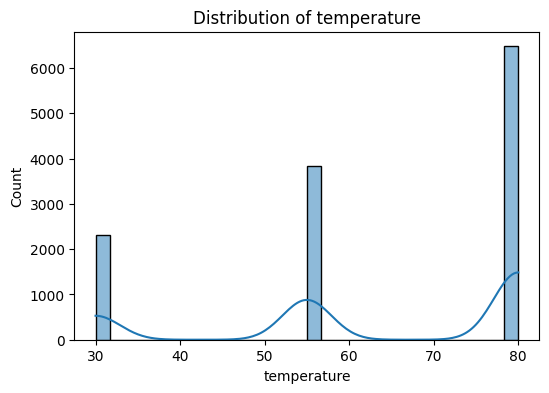

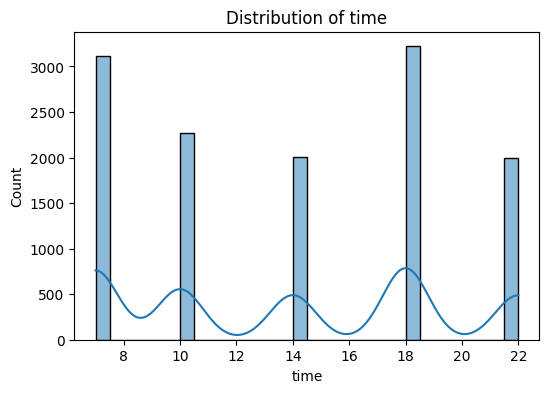

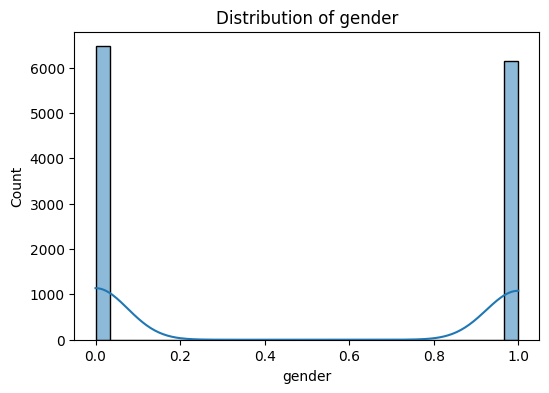

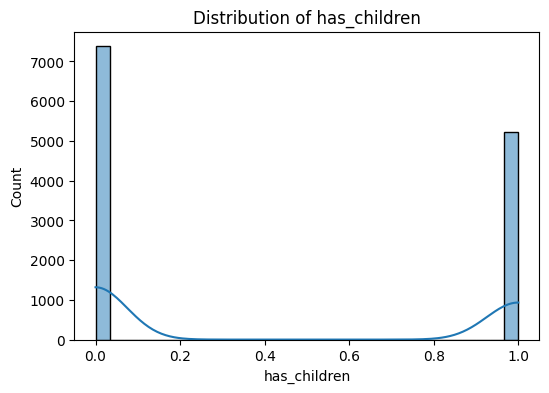

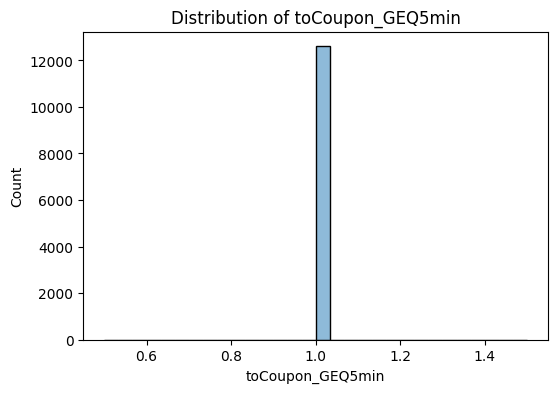

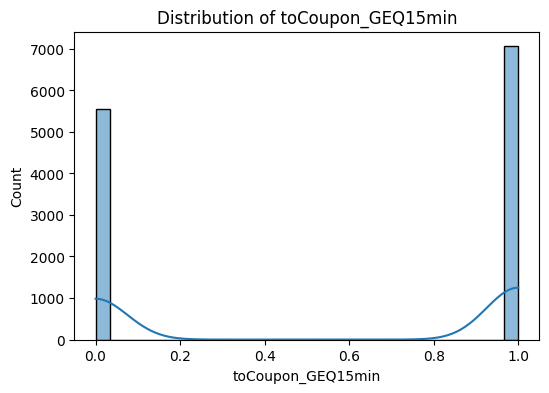

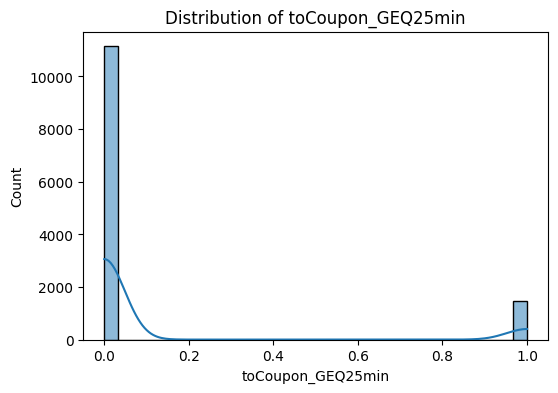

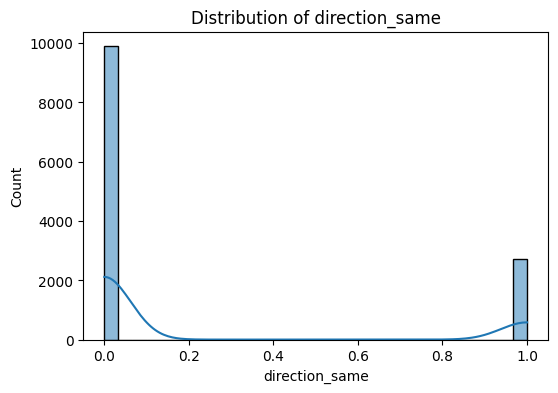

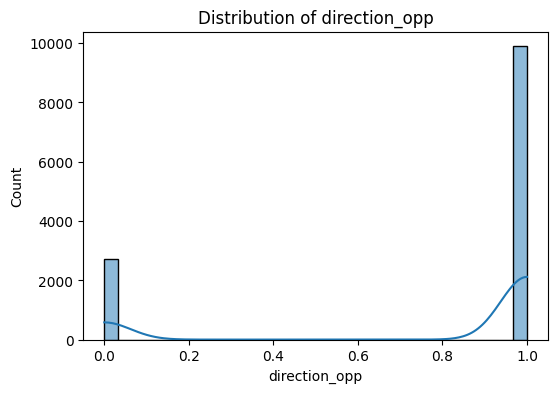

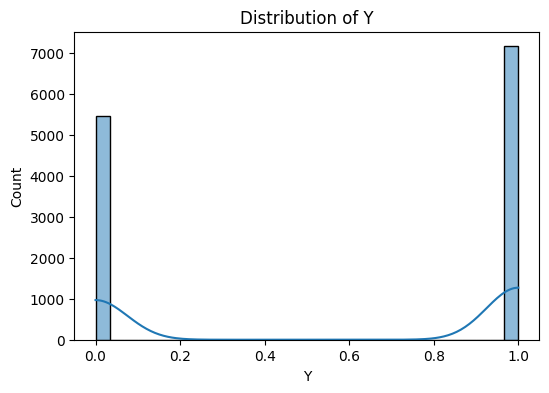

In [158]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [159]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outlier count per column:")
print(outliers)


Outlier count per column:
temperature             0
time                    0
gender                  0
has_children            0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min    1463
direction_same       2718
direction_opp        2718
Y                       0
dtype: int64


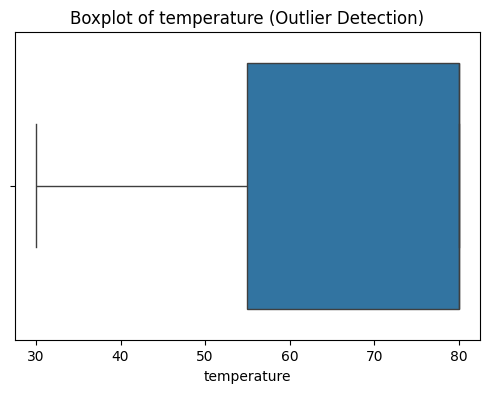

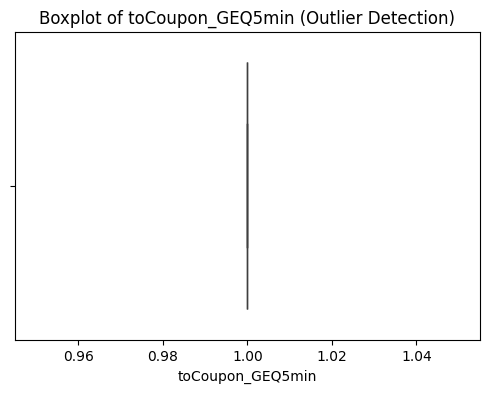

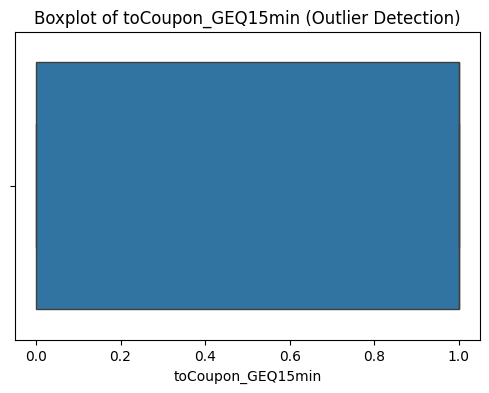

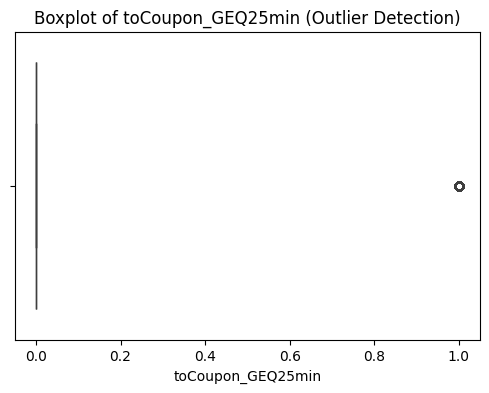

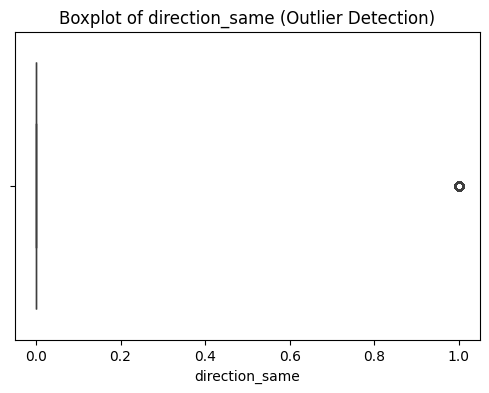

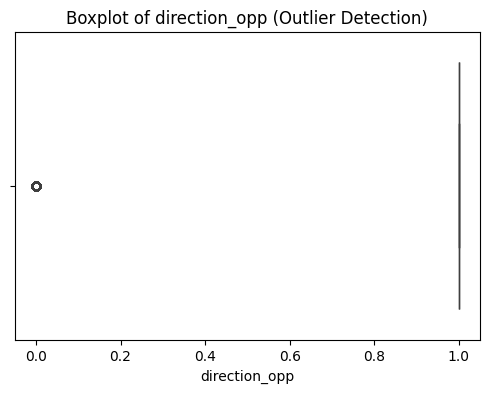

In [160]:
column_names1 = ["temperature", "toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min", "direction_same", "direction_opp"]
for col in column_names1:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()

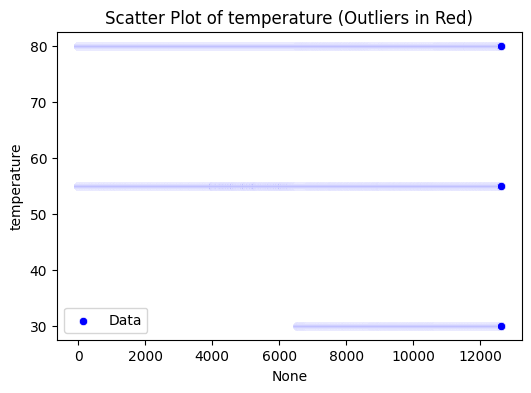

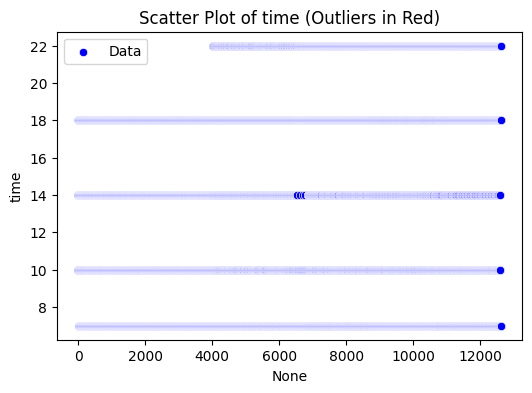

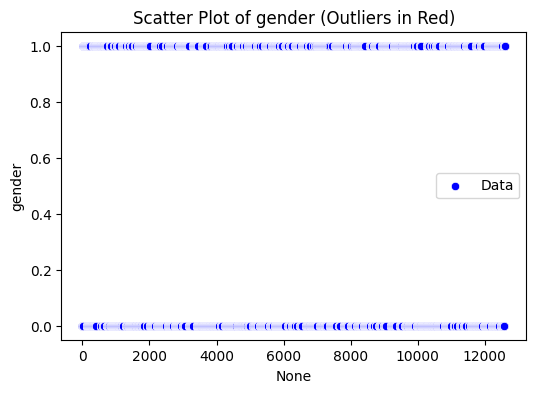

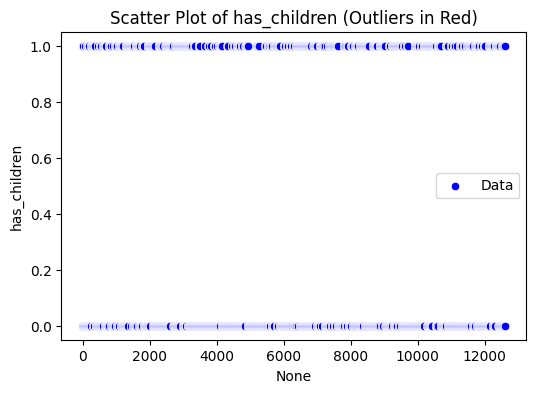

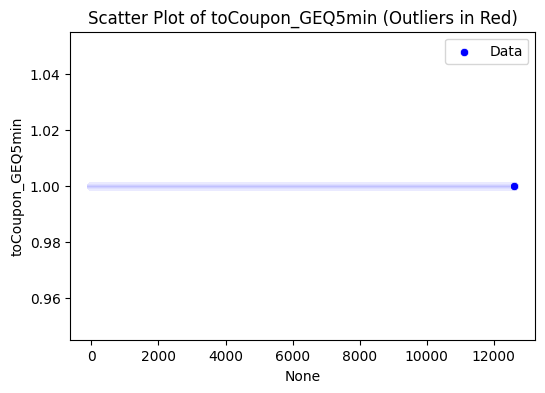

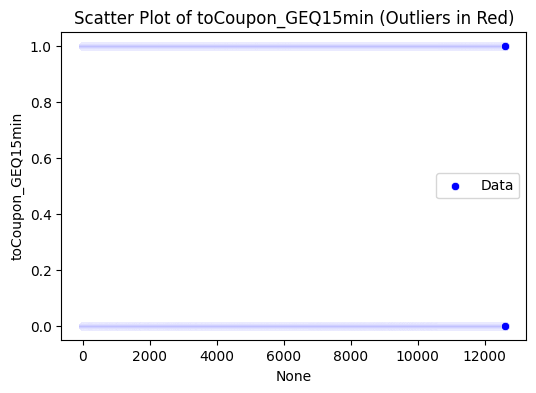

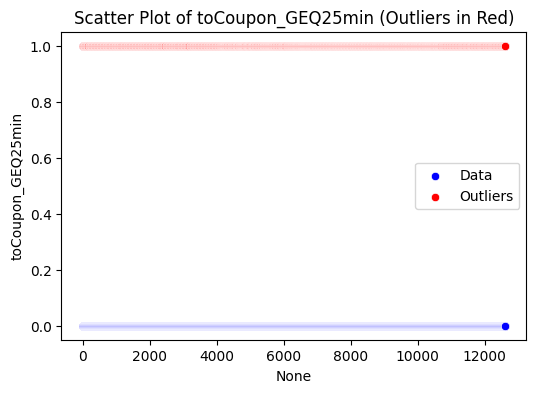

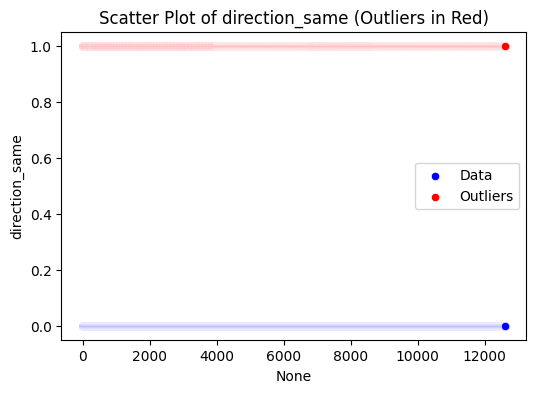

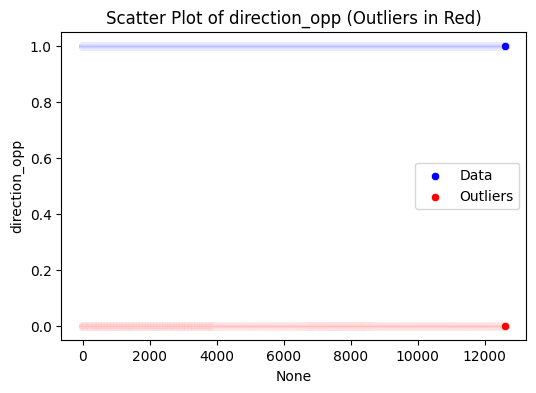

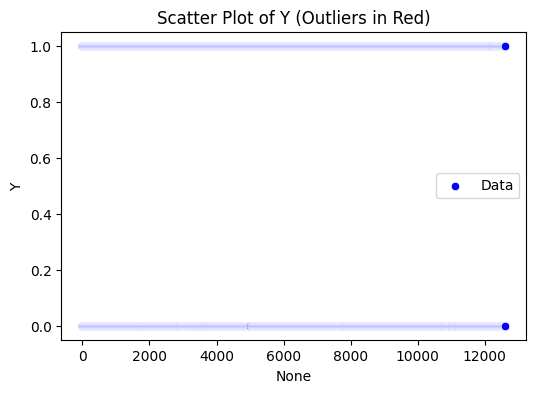

In [161]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df.index, y=df[col], color="blue", label="Data")

    lower_bound_col = Q1[col] - 1.5 * IQR[col]
    upper_bound_col = Q3[col] + 1.5 * IQR[col]
    outliers = (df[col] < lower_bound_col) | (df[col] > upper_bound_col)
    sns.scatterplot(x=df.index[outliers], y=df[col][outliers], color="red", label="Outliers")

    plt.title(f"Scatter Plot of {col} (Outliers in Red)")
    plt.legend()
    plt.show()

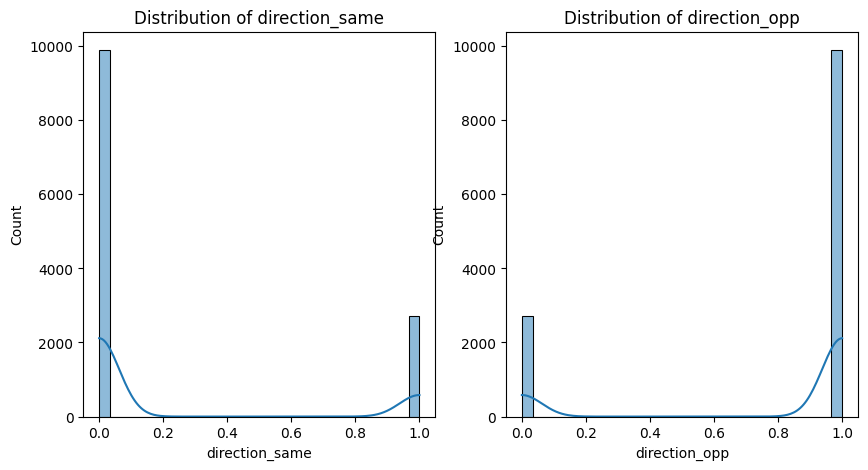

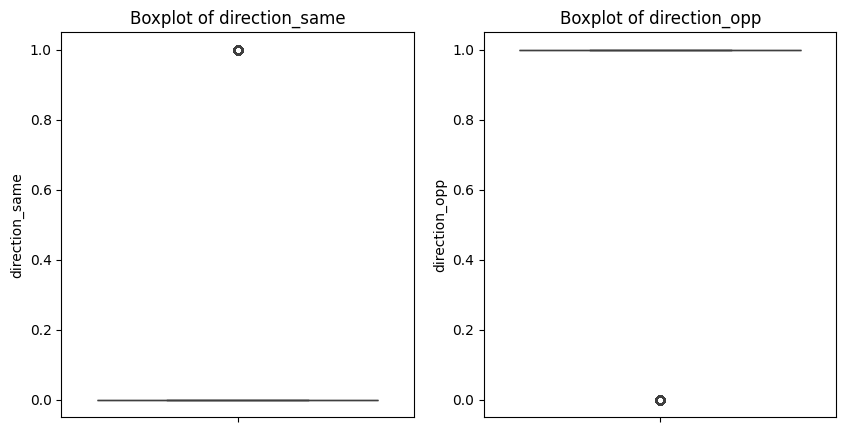

Skewness of direction_same: 1.3835491513309097
Skewness of direction_opp: -1.3835491513309097


In [162]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['direction_same'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of direction_same')

sns.histplot(df['direction_opp'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of direction_opp')

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df['direction_same'], ax=axes[0])
axes[0].set_title('Boxplot of direction_same')

sns.boxplot(y=df['direction_opp'], ax=axes[1])
axes[1].set_title('Boxplot of direction_opp')

plt.show()

from scipy.stats import skew

skew_direction_same = skew(df['direction_same'])
skew_direction_opp = skew(df['direction_opp'])

print(f'Skewness of direction_same: {skew_direction_same}')
print(f'Skewness of direction_opp: {skew_direction_opp}')



In [163]:
pt = PowerTransformer(method='yeo-johnson')

df[['direction_same', 'direction_opp']] = pt.fit_transform(df[['direction_same', 'direction_opp']])

from scipy.stats import skew
print("Skewness of direction_same after Yeo-Johnson:", skew(df['direction_same']))
print("Skewness of direction_opp after Yeo-Johnson:", skew(df['direction_opp']))


Skewness of direction_same after Yeo-Johnson: 1.3835491513309104
Skewness of direction_opp after Yeo-Johnson: -1.3835491513309106


In [164]:
shapiro_test_same = shapiro(df["direction_same"])
shapiro_test_opp = shapiro(df["direction_opp"])

print("Shapiro-Wilk Test for direction_same (after transformation):", shapiro_test_same.pvalue)
print("Shapiro-Wilk Test for direction_opp (after transformation):", shapiro_test_opp.pvalue)


Shapiro-Wilk Test for direction_same (after transformation): 2.0216572796718079e-103
Shapiro-Wilk Test for direction_opp (after transformation): 2.0216572796694471e-103


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12610.
  res = hypotest_fun_out(*samples, **kwds)


In [165]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["direction_same_capped"] = np.clip(df["direction_same"], lower_bound, upper_bound)

Q1 = df["direction_opp"].quantile(0.25)
Q3 = df["direction_opp"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["direction_opp_capped"] = np.clip(df["direction_opp"], lower_bound, upper_bound)

skew_direction_same = skew(df["direction_same_capped"])
skew_direction_opp = skew(df["direction_opp_capped"])

print(f"Skewness of direction_same after capping: {skew_direction_same}")
print(f"Skewness of direction_opp after capping: {skew_direction_opp}")


Skewness of direction_same after capping: nan
Skewness of direction_opp after capping: nan


<ipython-input-165-6d3bf08246e6>:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_direction_opp = skew(df["direction_opp_capped"])


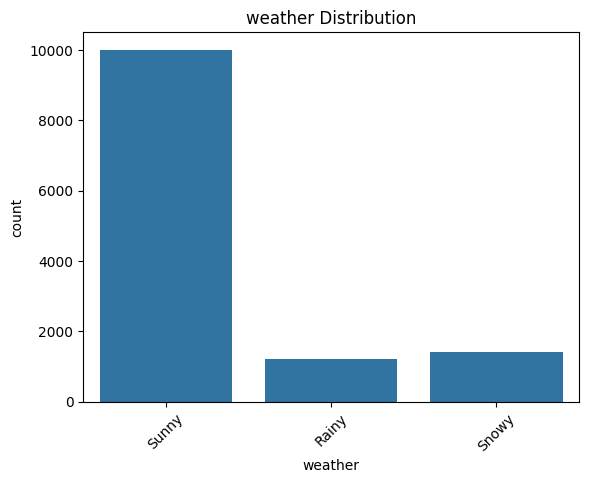

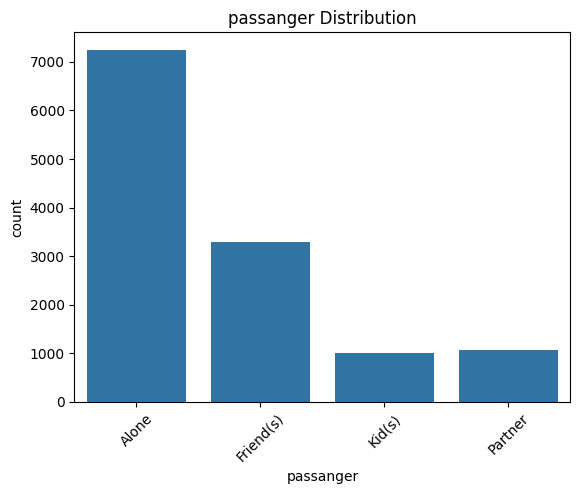

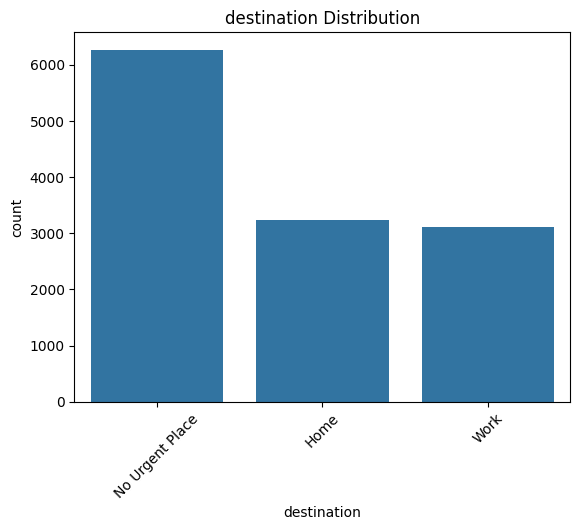

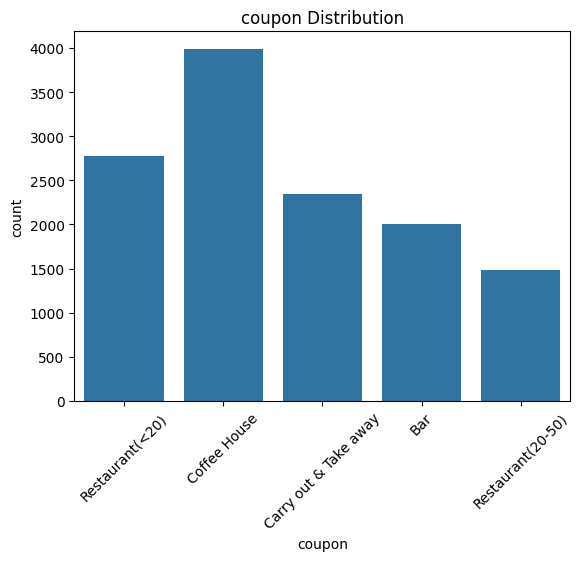

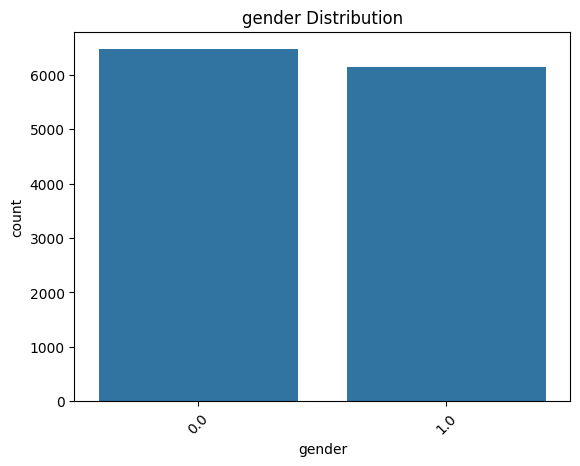

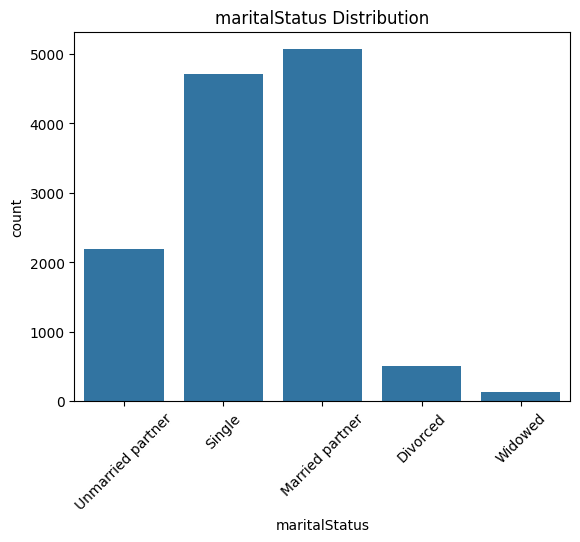

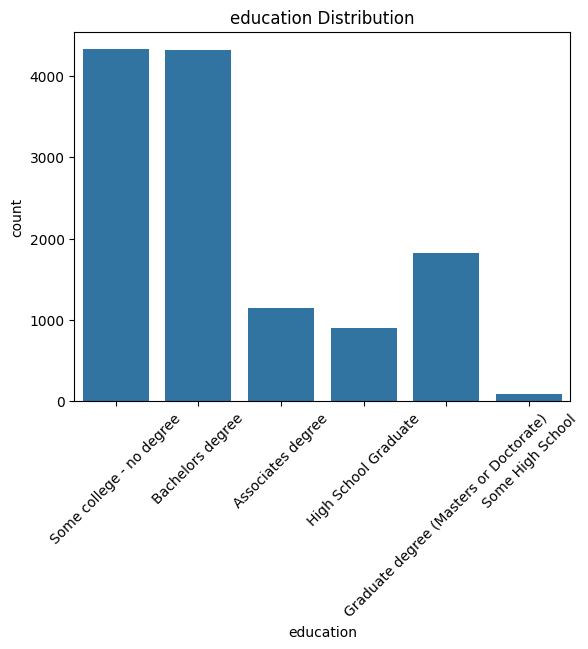

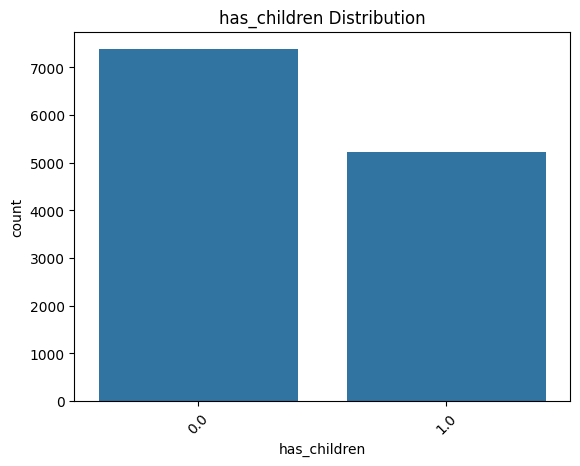

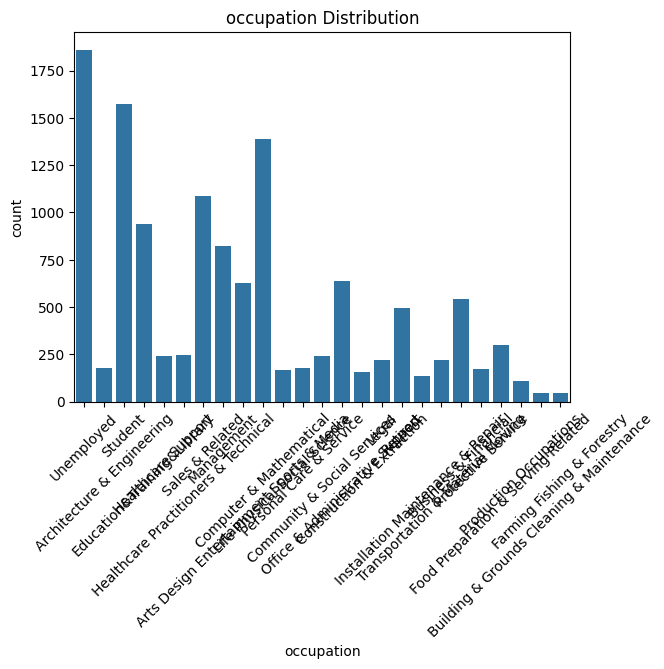

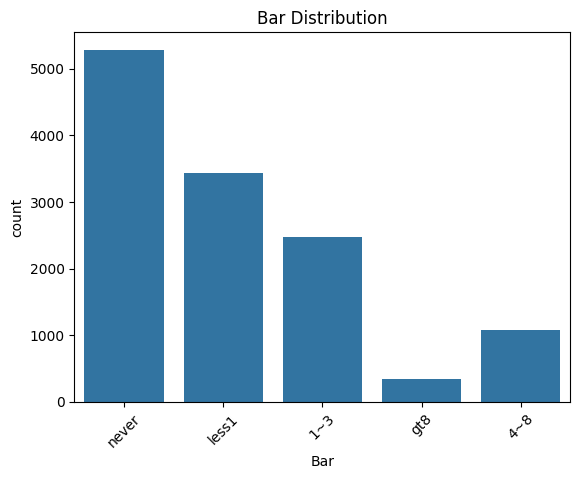

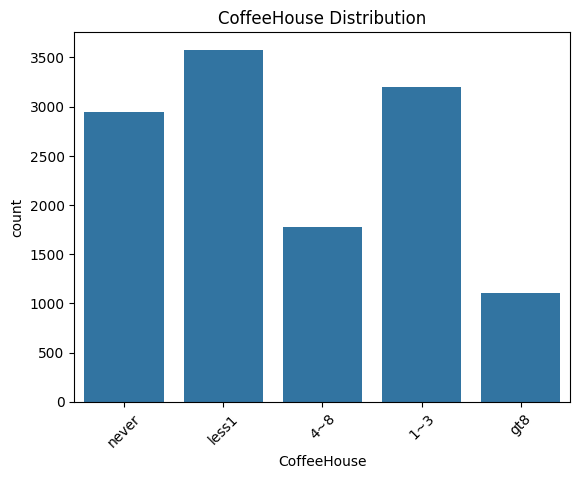

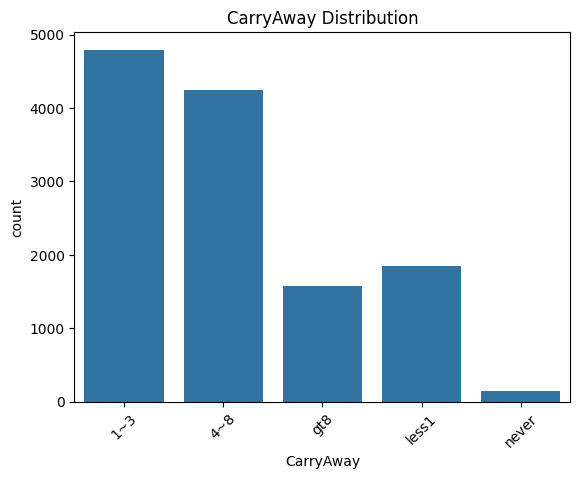

In [166]:
column_names2 = ["weather", "passanger", "destination", "coupon", "gender", "maritalStatus", "education", "has_children", "occupation", "Bar", "CoffeeHouse", "CarryAway"]
for col in column_names2:
  sns.countplot(x=df[col])
  plt.title(f"{col} Distribution")
  plt.xticks(rotation=45)
  plt.show()

In [167]:
for col in ['passanger', 'gender', 'maritalStatus', 'education', 'occupation', 'weather', 'destination']:
    print(f"{col}:\n", df[col].value_counts(), "\n")


passanger:
 passanger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64 

gender:
 gender
0.0    6469
1.0    6141
Name: count, dtype: int64 

maritalStatus:
 maritalStatus
Married partner      5068
Single               4716
Unmarried partner    2185
Divorced              511
Widowed               130
Name: count, dtype: int64 

education:
 education
Some college - no degree                  4325
Bachelors degree                          4323
Graduate degree (Masters or Doctorate)    1827
Associates degree                         1148
High School Graduate                       899
Some High School                            88
Name: count, dtype: int64 

occupation:
 occupation
Unemployed                                   1861
Student                                      1575
Computer & Mathematical                      1390
Sales & Related                              1088
Education&Training&Library                    939
Management      

In [168]:
threshold = 100
df['occupation'] = df['occupation'].apply(lambda x: x if df['occupation'].value_counts()[x] >= threshold else 'Other')

In [169]:
df.to_csv("dataset.csv", index=False)
from google.colab import files
files.download("dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>